## 1.Initial data prep section.  Read, clean and create sets.

### Importing required modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

### Reading Dataset

In [4]:
df = pd.read_csv('BlackFridaySalesResized.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Cleaning Dataset

### Encoding the categorical variables

In [5]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [6]:
df['Gender'] = lr.fit_transform(df['Gender'])
# Converting all the F values to numeic 0 and M values to numeric 1 in 'Gender' column

In [7]:
df['Age'] = lr.fit_transform(df['Age'])
# Converting all the values in 'Age' column to numeric as per the age range defined

In [8]:
df['City_Category'] = lr.fit_transform(df['City_Category'])
# Converting all the values in 'City_Category' column to numeric 

In [9]:
df['Stay_In_Current_City_Years'] = lr.fit_transform(df['Stay_In_Current_City_Years'])
# Converting all the values in 'Stay_In_Current_City_Years' column to numeric 

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


### Removing NULL values

In [11]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")
# Replacing the NULL values with a negative value, so that the results will not get affected.

In [12]:
df.isnull().sum()
#checking the NULL values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     159999 non-null  int64  
 1   Product_ID                  159999 non-null  object 
 2   Gender                      159999 non-null  int32  
 3   Age                         159999 non-null  int32  
 4   Occupation                  159999 non-null  int64  
 5   City_Category               159999 non-null  int32  
 6   Stay_In_Current_City_Years  159999 non-null  int32  
 7   Marital_Status              159999 non-null  int64  
 8   Product_Category_1          159999 non-null  int64  
 9   Product_Category_2          159999 non-null  float32
 10  Product_Category_3          159999 non-null  float32
 11  Purchase                    159999 non-null  int64  
dtypes: float32(2), int32(4), int64(5), object(1)
memory usage: 11.0+ MB


In [14]:
df.nunique()

User_ID                        5883
Product_ID                     3429
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      15228
dtype: int64

### Dropping the irrelevant columns

In [15]:
df = df.drop(["User_ID","Product_ID"],axis=1)
#  Dropping 'User_ID' and 'Product_ID' as it has more unique values.This will help in acheiving more accurate model prediction.

### Splitting data into independent and dependent variables

In [16]:
X = df.drop(["Purchase","Gender"],axis=1)

In [17]:
y=df['Purchase']

### Creating training and testing datasets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (119999, 8)
X_test shape: (40000, 8)
y_train shape: (119999,)
y_test shape: (40000,)


## 2. Initial set of features for X and the target feature y

**Set of features for X** : Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1,                    &emsp  Product_Category_2, Product_Category_3 <br>
**Target feature y** : Purchase<br>
These combination of features, help us build a model which will help us understand the customer purchase behaviour specifically, purchase amount against various products of different categories.

## 3. Linear regression on X and y

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.intercept_

9944.20569922821

In [22]:
lr.coef_

array([ 103.94672868,    7.85603022,  327.82840003,    4.92811859,
        -49.25964252, -319.19768024,   12.99006941,  131.9377743 ])

In [23]:
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [25]:
mean_absolute_error(y_test, y_pred)


3534.4213412984623

In [26]:
mean_squared_error(y_test, y_pred)

21455311.69971133

In [27]:
r2_score(y_test, y_pred)

0.13427159610693196

In [28]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))


RMSE of Linear Regression Model is  4631.98787775954


In [30]:
accuracy = lr.score(X_test,y_test)
print(accuracy*100,'%')

13.427159610693195 %


## 4. Results<br>
From the basic Linear regression model we developed, it can be said that a resonable RMSE values are obtained. 

## 5.  Trying a different approach through Cross validation score

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split
X = df.drop(["Purchase"],axis=1)
y=df['Purchase']

def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y,         
random_state=25, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("CV Score:", np.sqrt(cv_score))
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))


CV Score: 4627.452641407225
Results
MSE: 4606.928522289958


<AxesSubplot:title={'center':'Model Coefficients'}>

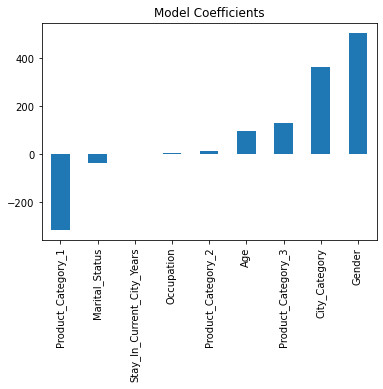

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

### Slightly better value are acheived here

## 6.Final Approach adding 'Gender' to the train and test set

In [33]:
X = df.drop(["Purchase"],axis=1)

In [34]:
y=df['Purchase']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (119999, 9)
X_test shape: (40000, 9)
y_train shape: (119999,)
y_test shape: (40000,)


In [36]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [37]:
lr2.intercept_

9608.71713357818

In [38]:
lr2.coef_

array([ 466.74312646,  105.39225478,    4.16395087,  331.21748159,
          3.3789234 ,  -46.33773439, -317.44018731,   13.05034947,
        131.30193135])

In [39]:
y_pred = lr2.predict(X_test)

In [40]:
mean_absolute_error(y_test, y_pred)

3533.7258202393696

In [41]:
mean_squared_error(y_test, y_pred)

21404114.396073323

In [42]:
r2_score(y_test, y_pred)

0.13633742300250484

In [43]:
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))


RMSE of Linear Regression Model is  4626.458083250439


### RMSE at this try is a little lesser compared to the previous try

### 7. Observations for the Parameters<br>
- Linear Regression model must have normalized data to give better results.<br>
- Gender category has high coefficient for the Linear Regression model
- Gender, City_Category, Product_Category_3, Age are positive parameters.
- Marital_Status and Product_Category_2 are negative parameters.
- Stay_In_Current_City_Years, Occupation and Product_Category_2 play a very neglible role in the predictions.

